# SPACEc: ML-enabled cell type annotation - STELLAR

After preprocessing the single-cell data, the next step is to assign cell types. Alternatively to the SVM (see notebook 3_cell_annotation_ml) model we included a wrapper for STELLAR, that allows to use the model in a more user-friendly way. Further information about STELLAR can be found here: http://snap.stanford.edu/stellar/

In [1]:
# import spacec first
import spacec as sp

#import standard packages
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import sys
import os
from git import Repo
import anndata

# silencing warnings
import warnings
warnings.filterwarnings('ignore')

sc.settings.set_figure_params(dpi=80, facecolor='white')

/opt/anaconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
root_path = "/Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity/" 
data_path = '/Users/arcz/Desktop/research/allo immunity/example_data/raw/'


output_dir = "/Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity/space/saves/"
os.makedirs(output_dir, exist_ok=True)

# STELLAR path
STELLAR_path = Path(root_path + 'stel/STELLAR/')

# Test if the path exists, if not create it
if not STELLAR_path.exists():
    STELLAR_path.mkdir(exist_ok=True, parents=True)
    repo_url = 'https://github.com/snap-stanford/stellar.git'
    Repo.clone_from(repo_url, STELLAR_path)

## Data Explanation
Annotated tonsil data is used as training & test data. </br>
Tonsillitis data is used as validation data.

In [3]:
# Load training data
adata = sc.read(output_dir + "adata_nn_demo_annotated.h5ad")
adata_train = adata[adata.obs['condition'] == 'tonsil']
adata_val  = adata[adata.obs['condition'] == 'tonsillitis']

## Training

In [4]:
import numpy as np
np.isnan(adata_train.X).sum()

0

In [5]:
# downsample the data for demonstration purposes
adata_train = adata_train[0:1000, :]
adata_val = adata_val[0:1000, :]

In [6]:
import torch 
print(torch.__version__) #need to downgrade from 2.5.1 to 2.3.0

"""
    conda activate spacec
    pip uninstall torch torchvision torchaudio
    pip install torch==2.3.0 ####torchvision torchaudio
    
    pip install torch-scatter -f https://data.pyg.org/whl/torch-2.3.0+cpu.html
    pip install torch-sparse -f https://data.pyg.org/whl/torch-2.3.0+cpu.html
    pip install torch-geometric==2.3.1


    then check stellar.py and modify import  to this:
    from torch_geometric.loader import ClusterData, ClusterLoader

"""

#also ran into this:
"""

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacec 0.1.1 requires cellpose==3.0.11, but you have cellpose 3.0.8 which is incompatible.

pip install cellpose==3.0.11 --upgrade
"""

adata_new = sp.tl.adata_stellar(adata_train, 
               adata_val, 
               celltype_col = "cell_type", 
               x_col = 'x', 
               y_col = 'y', 
               sample_rate = 0.5, 
               distance_thres = 50,
               STELLAR_path = STELLAR_path)

2.3.0
Please consider to cite the following paper when using STELLAR: Brbić, M., Cao, K., Hickey, J.W. et al. Annotation of spatially resolved single-cell data with STELLAR. Nat Methods 19, 1411–1418 (2022). https://doi.org/10.1038/s41592-022-01651-8
Preparing input data
Number of unique cell types: 10
Cell types: ['B cell' 'CD4+ T cell' 'DC' 'Epithelial cell' 'GCB' 'M1 Macrophage'
 'M2 Macrophage' 'Mast cell' 'Plasma cell' 'Vessel']
Cell type mapping size: 10
First 3 mappings: [('B cell', 0), ('CD4+ T cell', 1), ('DC', 2)]
Building dataset
Training data shape: (1000, 58), max label index: 999
Testing data shape: (1000, 58), max label index: 999
Max labeled edge index: 999
Max unlabeled edge index: 999
Setting input dimension to: 58
Running STELLAR
Model has 42112 parameters


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Computing METIS partitioning...
Done!


Loss: 1.743032


Computing METIS partitioning...
Done!


Loss: 1.151218


Computing METIS partitioning...
Done!


Loss: 0.959183


Computing METIS partitioning...
Done!


Loss: 0.851905


Computing METIS partitioning...
Done!


Loss: 0.786400


Computing METIS partitioning...
Done!


Loss: 0.738267


Computing METIS partitioning...
Done!


Loss: 0.697989


Computing METIS partitioning...
Done!


Loss: 0.670896


Computing METIS partitioning...
Done!


Loss: 0.649215


Computing METIS partitioning...
Done!


Loss: 0.626750


Computing METIS partitioning...
Done!


Loss: 0.609484


Computing METIS partitioning...
Done!


Loss: 0.595280


Computing METIS partitioning...
Done!


Loss: 0.587198


Computing METIS partitioning...
Done!


Loss: 0.570440


Computing METIS partitioning...
Done!


Loss: 0.563863


Computing METIS partitioning...
Done!


Loss: 0.559357


Computing METIS partitioning...
Done!


Loss: 0.555458


Computing METIS partitioning...
Done!


Loss: 0.552907


Computing METIS partitioning...
Done!


Loss: 0.547799


Computing METIS partitioning...
Done!


Loss: 0.539584


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.109375


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 1.049120


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.440655


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.387852


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.377558


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.357821


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.341566


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.360380


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.268507


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.290947


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.204249


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.276302


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.296129


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.180285


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.215534


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.094700


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.100745


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.155407


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.131768


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.135710


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.101808


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.130961


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.108310


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.024938


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.065150


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.076061


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.090284


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.058617


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.038070


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.076050


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.057950


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.010489


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.004800


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.039023


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.022745


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.007088


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.080276


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.012068


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.068117


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.006382


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.007719


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.049617


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.003838


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.001694


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.078325


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.072709


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.014714


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.001795


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.026607


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.079672
Mean prediction uncertainty: 0.0739
Prediction distribution:
Class 0: 312 cells (31.20%)
Class 1: 2 cells (0.20%)
Class 2: 2 cells (0.20%)
Class 4: 14 cells (1.40%)
Class 5: 2 cells (0.20%)
Class 6: 159 cells (15.90%)
Class 7: 8 cells (0.80%)
Class 8: 2 cells (0.20%)
Class 9: 2 cells (0.20%)
Class 10: 93 cells (9.30%)
Class 11: 386 cells (38.60%)
Class 12: 18 cells (1.80%)


## Inspect the results

again same reasons for probable different results

In [7]:
adata_new.obs

,DAPI,x,y,area,region_num,unique_region,condition,leiden_1,leiden_1_subcluster,cell_type_coarse,cell_type_coarse_subcluster,cell_type_coarse_f,cell_type_coarse_f_subcluster,cell_type,stellar_pred
1,123.677686,1322.851240,5.359504,242.0,1,reg002,tonsillitis,16,"16,0",Treg,Treg,Treg,Treg,Treg,M2 Macrophage
3,49.660959,641.938356,8.544521,292.0,1,reg002,tonsillitis,20,"20,2",Epithelial cell,Epithelial cell,Epithelial cell,Epithelial cell,Epithelial cell,Plasma cell
4,148.702532,1303.702532,9.006329,158.0,1,reg002,tonsillitis,15,15,M2 Macrophage,M2 Macrophage,M2 Macrophage,M2 Macrophage,M2 Macrophage,B cell
6,64.600000,1408.216667,10.633333,120.0,1,reg002,tonsillitis,1,"1,0",recluster,"recluster,9",recluster,"recluster,10",CD4+ T cell,M2 Macrophage
7,52.129630,1285.222222,11.500000,54.0,1,reg002,tonsillitis,20,"20,0",Epithelial cell,Epithelial cell,Epithelial cell,Epithelial cell,Epithelial cell,M2 Macrophage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,65.439716,894.031915,274.046099,282.0,1,reg002,tonsillitis,12,"12,2",CD4+ T cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,New_Class_11
1042,56.893939,925.209091,274.187879,330.0,1,reg002,tonsillitis,12,"12,2",CD4+ T cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,New_Class_11
1043,56.682692,950.526442,276.000000,416.0,1,reg002,tonsillitis,12,"12,2",CD4+ T cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,New_Class_11
1044,82.884521,1248.024570,275.343980,407.0,1,reg002,tonsillitis,12,"12,0",CD4+ T cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,New_Class_11


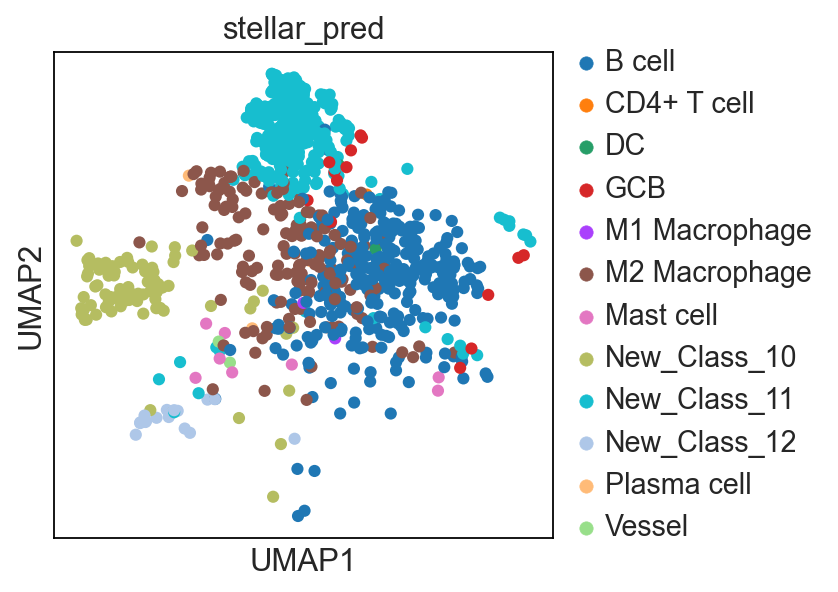

In [8]:
sc.pl.umap(adata_new, color = 'stellar_pred')

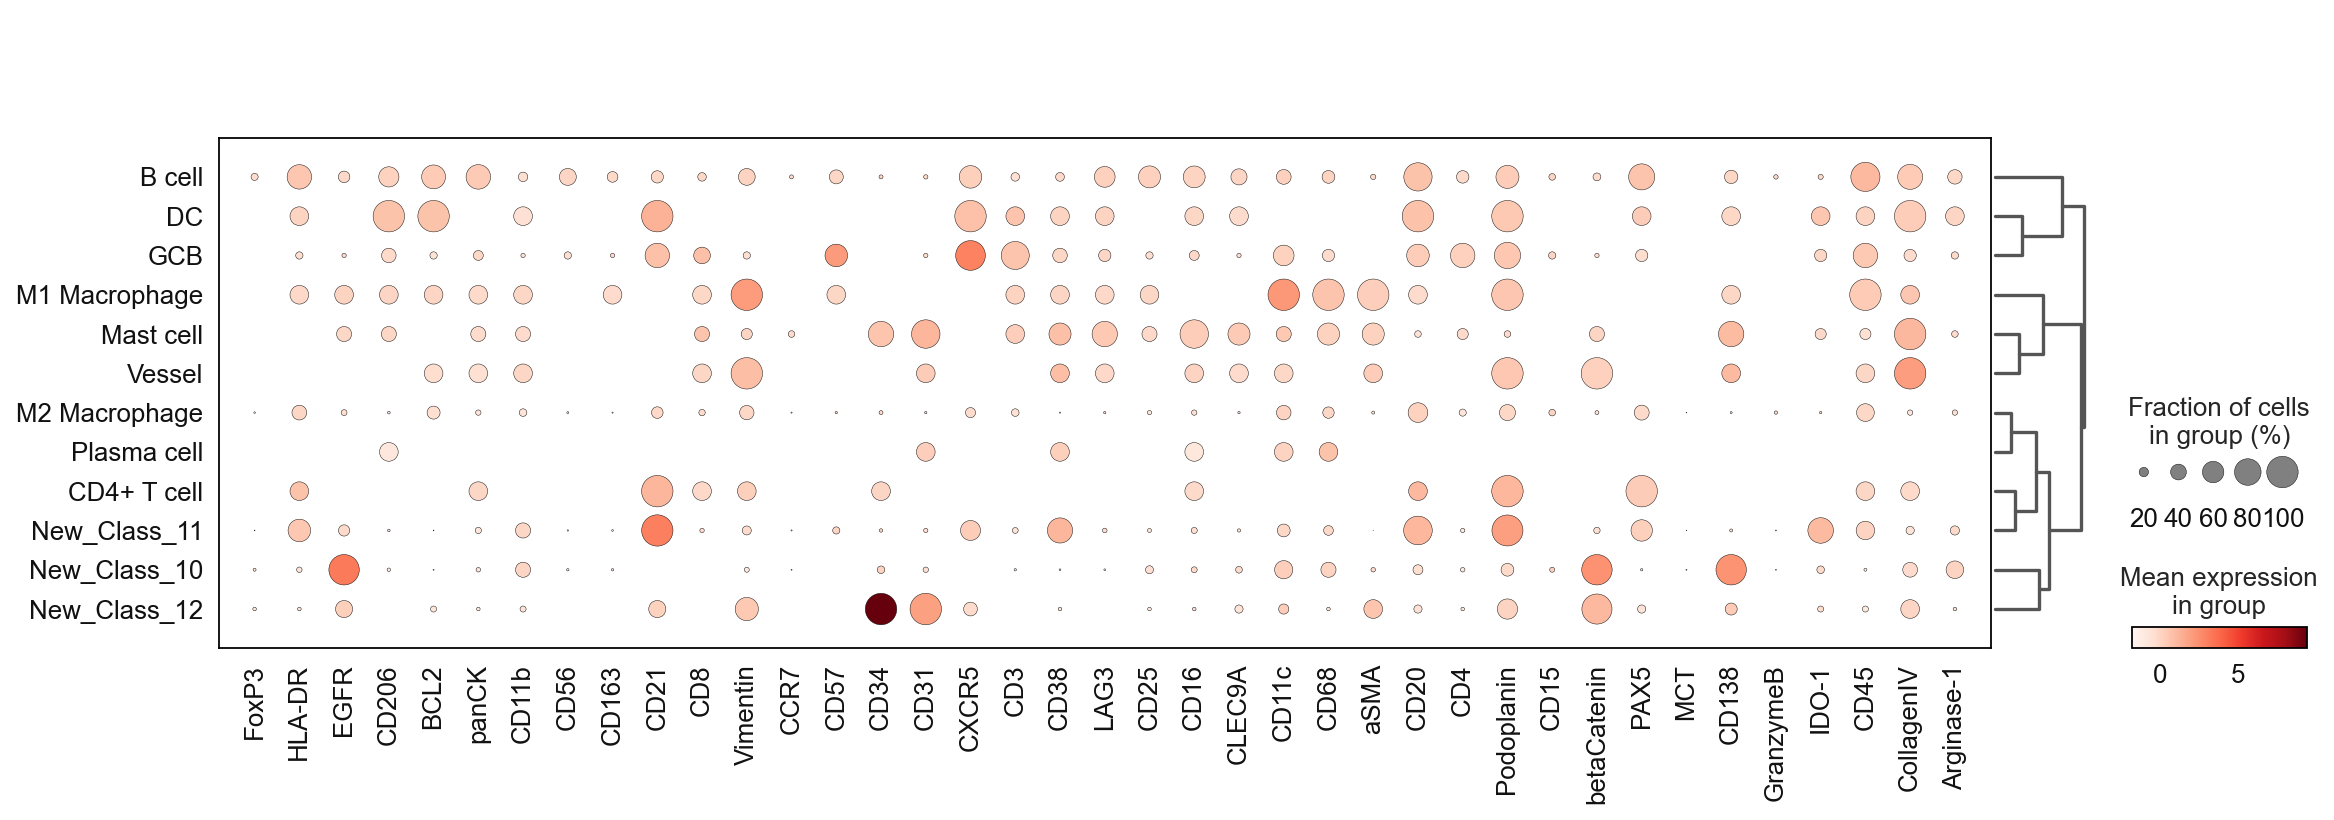

In [9]:
marker_list = [
    'FoxP3', 'HLA-DR', 'EGFR', 'CD206', 'BCL2', 'panCK', 'CD11b', 'CD56', 'CD163', 'CD21', 'CD8', 
    'Vimentin', 'CCR7', 'CD57', 'CD34', 'CD31', 'CXCR5', 'CD3', 'CD38', 'LAG3', 'CD25', 'CD16', 'CLEC9A', 'CD11c', 
    'CD68', 'aSMA', 'CD20', 'CD4','Podoplanin', 'CD15', 'betaCatenin', 'PAX5', 
    'MCT', 'CD138', 'GranzymeB', 'IDO-1', 'CD45', 'CollagenIV', 'Arginase-1']

sc.pl.dotplot(adata_new, marker_list, 'stellar_pred', dendrogram = True)

## Single-cell visualzation

,x,y,stellar_pred,condition
1,1322.851240,5.359504,M2 Macrophage,tonsillitis
3,641.938356,8.544521,Plasma cell,tonsillitis
4,1303.702532,9.006329,B cell,tonsillitis
6,1408.216667,10.633333,M2 Macrophage,tonsillitis
7,1285.222222,11.500000,M2 Macrophage,tonsillitis
...,...,...,...,...
1041,894.031915,274.046099,New_Class_11,tonsillitis
1042,925.209091,274.187879,New_Class_11,tonsillitis
1043,950.526442,276.000000,New_Class_11,tonsillitis
1044,1248.024570,275.343980,New_Class_11,tonsillitis


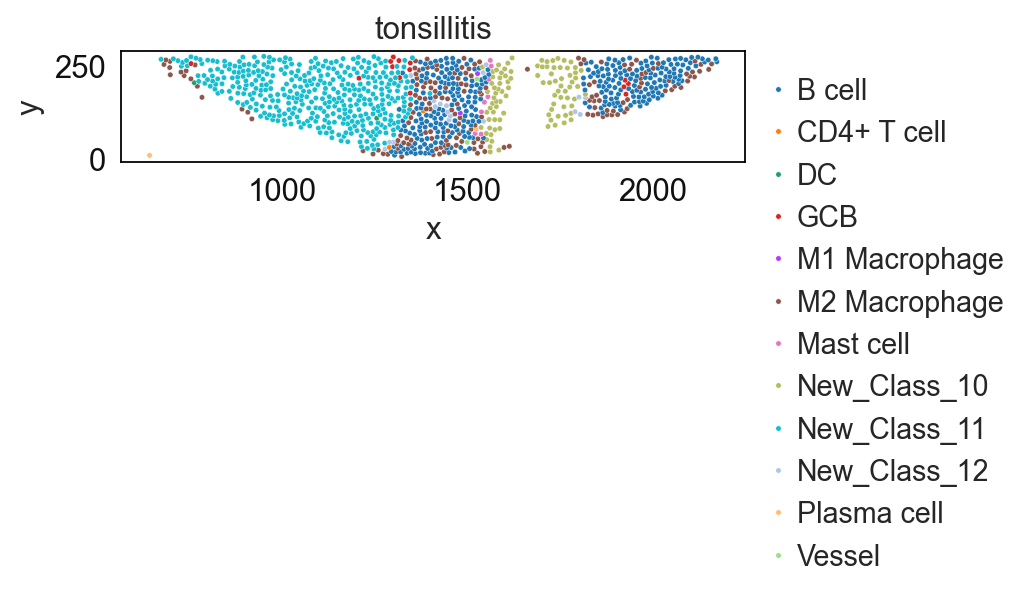

In [10]:
sp.pl.catplot(
    adata_new, color = "stellar_pred", # specify group column name here e.g. celltype_fine)
    unique_region = "condition", # specify unique_regions here
    X='x', Y='y', # specify x and y columns here
    n_columns=1, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # save figure as pdf
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir=output_dir, # specify output directory here (if savefig=True)
)

,x,y,cell_type,condition
1,1322.851240,5.359504,Treg,tonsillitis
3,641.938356,8.544521,Epithelial cell,tonsillitis
4,1303.702532,9.006329,M2 Macrophage,tonsillitis
6,1408.216667,10.633333,CD4+ T cell,tonsillitis
7,1285.222222,11.500000,Epithelial cell,tonsillitis
...,...,...,...,...
1041,894.031915,274.046099,CD4+ T cell,tonsillitis
1042,925.209091,274.187879,CD4+ T cell,tonsillitis
1043,950.526442,276.000000,CD4+ T cell,tonsillitis
1044,1248.024570,275.343980,CD4+ T cell,tonsillitis


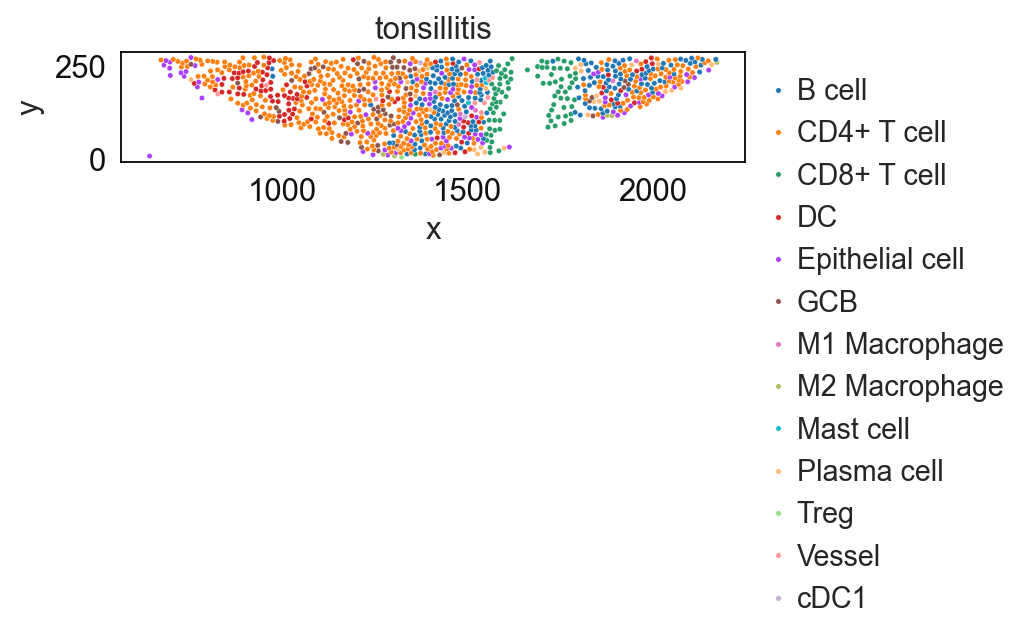

In [11]:
sp.pl.catplot(
    adata_new, color = "cell_type", # specify group column name here e.g. celltype_fine)
    unique_region = "condition", # specify unique_regions here
    X='x', Y='y', # specify x and y columns here
    n_columns=1, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # save figure as pdf
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir=output_dir,) # specify output directory here (if savefig=True)